# Sea Snail (Abalone) Age and Gender Prediction 
# NAME: Shubham Kumar <br>PRN: 18030142032


<b>Abalone </b> is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in Great Britain, abalone in South Africa, and pāua in New Zealand. These are sea snails that are quite in dangered in South Africa at least, but can be found in Australia, Great Britian and New Zealand.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. <br>
The gender of a live abalone is determined by holding it out of the water with the holes along the bottom.<br>
Other measurements, which are easier to obtain, are used to predict the age.

<b><u>Table of Contents</u></b>
- DataSet
- Dependencies
- Data Exploration
- Wrangling- Cleaning & Preprocessing
- Visualization
- Observation
- Predictive Analysis using Classification Algorithms
- Algorithms Application on dataset for Age and Gender Prediction
- Conclusion

### <br><br><br><br><u>Dataset Location:</u> https://archive.ics.uci.edu/ml/datasets/abalone

#### Dataset Description

### <br><br><br><br>Import Dependencies 
<b>Libraries Used:</b> Numpy, Pandas, Seaborn, Matplotlib, Sklearn 

In [1]:
# data analysis
import numpy as np
import pandas as pd 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### <br><br><br><br>Data Loading from CSV and Exploration

In [2]:
data = pd.read_csv('./sea-snail-abalone.csv')

In [3]:
print("The dimension of dataset (row,column):",data.shape)
print("\nThere are 9 Columns of the given dataset which are as follows :\n",list(data.columns))

The dimension of dataset (row,column): (4177, 9)

There are 9 Columns of the given dataset which are as follows :
 ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null object
Height            4175 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null object
Viscera weight    4175 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 293.8+ KB


The information shows that there are some values missing from 'Height' and 'Viscera weight' column and the data-type for 'Diameter' and 'Shucked weight' are not numeric values.<br><br>

In [5]:
data.describe() # DataSet Description

,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
count,4177.000000,4175.000000,4177.000000,4175.000000,4177.000000,4177.000000
mean,0.523992,0.139583,0.828742,0.180678,0.238831,9.933684
std,0.120093,0.041725,0.490389,0.109572,0.139203,3.224169
min,0.075000,0.010000,0.002000,0.000500,0.001500,1.000000
25%,0.450000,0.115000,0.441500,0.093500,0.130000,8.000000
50%,0.545000,0.140000,0.799500,0.171000,0.234000,9.000000
75%,0.615000,0.165000,1.153000,0.253000,0.329000,11.000000
max,0.815000,1.130000,2.825500,0.760000,1.005000,29.000000


## <br><br><br><br>Data Wrangling: Editing, Cleaning and Preprocessing

In [6]:
data.columns = data.columns.str.replace(' ', '_') # replacing whitespaces to underscore
data.columns = data.columns.str.lower() # changing from camel-case to lower case.

In [7]:
data.head() 

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.42,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.dtypes # Data Types for each column before conversion.

sex                object
length            float64
diameter           object
height            float64
whole_weight      float64
shucked_weight     object
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [9]:
# Checking whether any column having the PERCENTAGE of NULL Values 
print(data.isnull().sum()/data.shape[0] * 100)

sex               0.000000
length            0.000000
diameter          0.000000
height            0.047881
whole_weight      0.000000
shucked_weight    0.000000
viscera_weight    0.047881
shell_weight      0.000000
rings             0.000000
dtype: float64


In [10]:
data.diameter = data.diameter.str.replace('?','0') # Replacing unwanted entries
data.diameter = pd.to_numeric(data.diameter) # Data type conversion of the column Diameter(it cannot be zero)
data.diameter[data.diameter == 0] = data.diameter.mean() # Updating missing values with median of the column

data.height = data.height.fillna(data.height.mean()) # Replacing NAN value with mean of column

data.shucked_weight = data.shucked_weight.str.replace('?','0') # Replacing unwanted entries
data.shucked_weight = pd.to_numeric(data.shucked_weight)  # Data type conversion of the column Shucked_Weight
data.shucked_weight[data.shucked_weight == 0] = data.shucked_weight.mean()# Updating missing values with median

data.viscera_weight = data.viscera_weight.fillna(data.viscera_weight.mean()) # Replacing NAN value with mean

In [11]:
data.dtypes # Data Types for each column after conversion.

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [12]:
# PERCENTAGE of NULL Values  
print(data.isnull().sum()/data.shape[0] * 100)

sex               0.0
length            0.0
diameter          0.0
height            0.0
whole_weight      0.0
shucked_weight    0.0
viscera_weight    0.0
shell_weight      0.0
rings             0.0
dtype: float64


In [13]:
# Verifying all the measurables for snail are greater than zero and positive
print(data.length.any() <= 0)         
print(data.diameter.any() <= 0)   
print(data.height.any() <= 0)
print(data.whole_weight.any() <= 0)
print(data.shucked_weight.any() <= 0) 
print(data.viscera_weight.any() <= 0) 
print(data.shell_weight.any() <= 0)
print(data.rings.any() <= 0)

False
False
False
False
False
False
False
False


The 'Length', 'Diameter', 'Height', 'Weights' can not be negative and zero. If any of the given values for the columns are zero or negative then the data about the Abalone is not correct. A living being has all these given properties(especially the sea snail).

## <br><br><br><br> Data Visualization

<b>Sex:</b> The sex variable is categrised into three parts: M for Male, F for Female and I for Infant(not adult). 

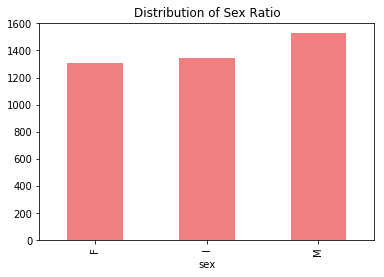

In [14]:
data.groupby(['sex']).count().plot(kind='bar',legend=False,colors='lightcoral')
plt.title('Distribution of Sex Ratio') 
plt.show()

The count of each category with bar plot shows that the dataset is balanced relative to gender attibutes. <br><br>

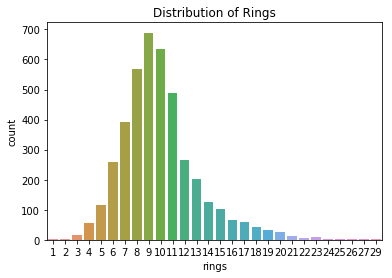

In [15]:
sns.countplot(data['rings'])
plt.title('Distribution of Rings')
plt.show()

<b>Rings:</b> Abalone with Rings between 7-11 have the most observations.<br><br>

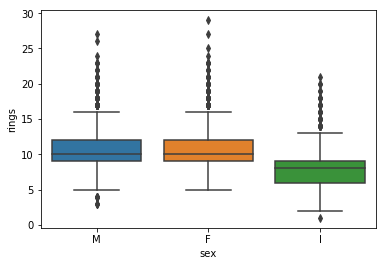

In [16]:
sns.boxplot(data=data, x='sex', y='rings')
plt.show()

- Distribution between Male and Female is similar
- Most of the Rings both for Male and Female are between 7 and 12
- Infants have mostly from 5 to 10 Rings

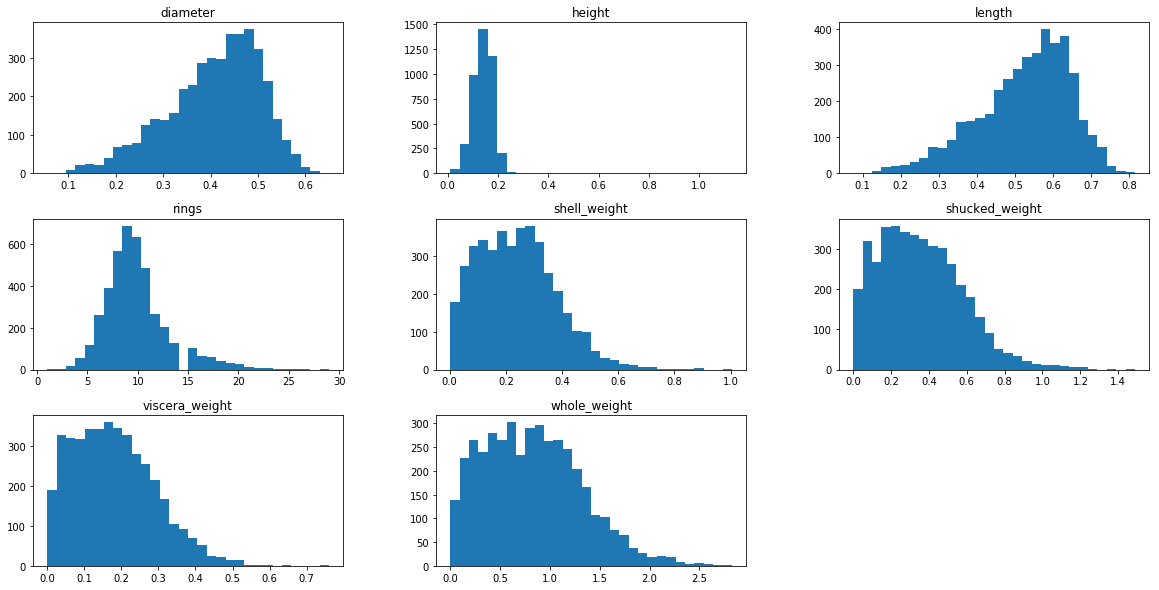

In [17]:
data.hist(figsize=(20,10), grid = False, layout=(3,3), bins = 30)
plt.show()

These Histogram shows the skewness of data.<br><br><br><br>

### Generating HeatMap to find out the correlation between each column

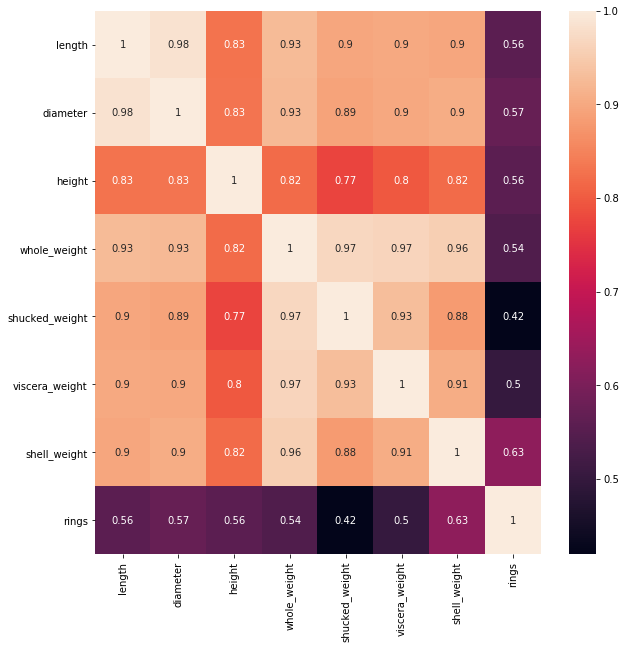

In [18]:
plt.figure(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

### The HeatMap shows the following features:- 
- Length is highly correlated with Diameter<br>
- Whole weight is highly correlated with all the features except Rings<br>
- From all the features excluding Rings, Height is least correlated with other features<br>
- Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter<br>
<br><br>

## Correlation Observation

In [19]:
# Common function to find any correlations in the dataset
def getAnyCorrelation(xcol,ycol):
    fig, ax = plt.subplots(1)
    for i in range(1):
        x=data[xcol]
        y=data[ycol]
        marker="o",
        alpha=0.2,
        ax.scatter(x,y, label=str(i))
    plt.ylabel(ycol)
    plt.xlabel(xcol)
    plt.title("Correlation between "+xcol+" & "+ycol,fontsize = 16)
    plt.show()

### Weight are linearly correlated with other weight features

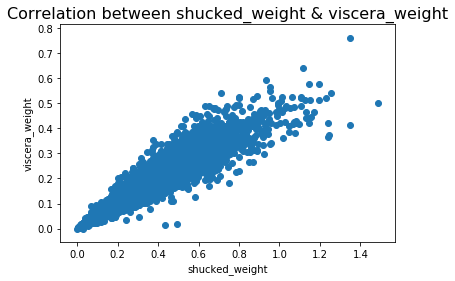

In [20]:
getAnyCorrelation('shucked_weight','viscera_weight')

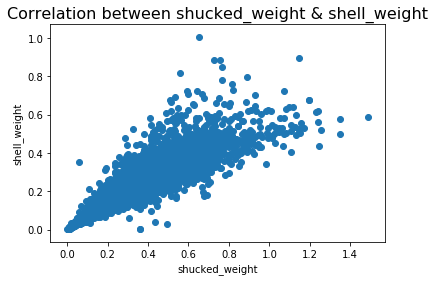

In [21]:
getAnyCorrelation('shucked_weight','shell_weight')

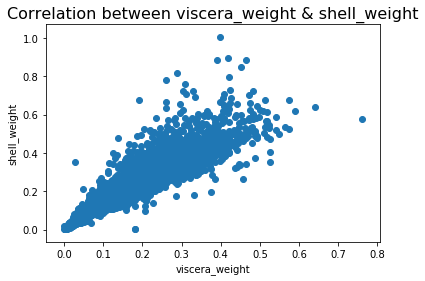

In [22]:
getAnyCorrelation('viscera_weight','shell_weight')

### Length and Diameter shows linear correlation

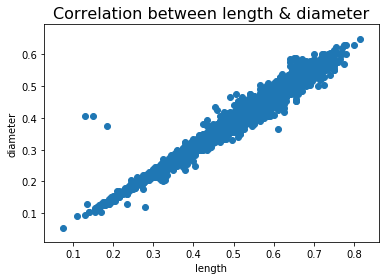

In [23]:
getAnyCorrelation('length','diameter') 

### Length, Diameter and Whole Weight shows linear correlation

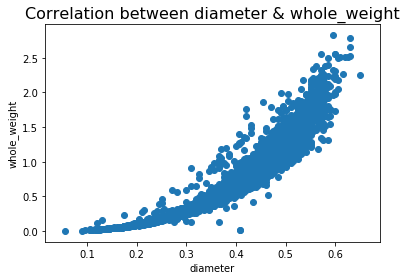

In [24]:
getAnyCorrelation('diameter','whole_weight')

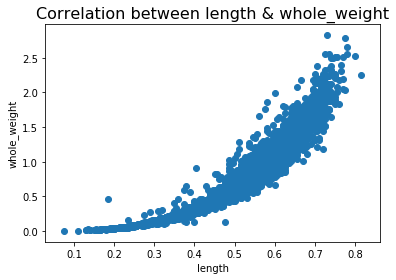

In [25]:
getAnyCorrelation('length','whole_weight')

# <br><br><br><br>Classification Algorithms Used for Predictive Analysis:

<b>1. K Nearest Neighbour</b> :- non-parametric, lazy learning algorithm. Purpose is to use a dataset in which the data points are separated into several classes to predict the classification of a new sample point. <br><br> 

<b>2. Support Vector Machine</b> :-  a powerful and flexible class of supervised algorithms for both classification and regression. Produces significant accuracy with less computation power. <br> <br> 

<b>3. Naive Bayes</b> :- a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Very useful as a quick-and-dirty baseline for a classification problem.<br>

I am going to apply these three aglorithms one by one to predict the Age and Gender of Abalone

# <br><br><br> 1. Age Prediction:
Age is a continious data. We can not apply classification model on age as it is regression problem. To do classification, I divided age into four categories namely: Young, Teen, Adult and Old. So now, the age of the Abalone can be predicted using classification model.

In [26]:
ds = data

In [27]:
def sexConversion(x,t):
    if x == t :
        return 1
    else: 
        return 0
    
ds['Sex_M'] = ds.sex.apply(lambda x: sexConversion(x,'M'))
ds['Sex_F'] = ds.sex.apply(lambda x: sexConversion(x,'F'))
ds['Sex_I'] = ds.sex.apply(lambda x: sexConversion(x,'I'))

#### Categorizing Rings into four parts: Young, Teen, Adult and Old for Age classification

In [28]:
bins = [8,9,11,ds['rings'].max()]
group_names = ['young','adult','old']
ds['rings'] = pd.cut(ds['rings'],bins, labels = group_names)
dictionary = {'young':0, 'teen':1, 'adult':2,'old':3}
ds['rings'] = ds['rings'].map(dictionary)

In [29]:
ds1 = ds.drop(['sex'], axis = 1)

## Splitting DataSet for Age Prediction

In [30]:
X = ds1.drop(['rings'], axis = 1)
y = ds1['rings']
y = y.fillna(y.mean())
y = y.astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=10)  

### 1. Applying KNN Model

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

74.17

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.45      0.25      0.32       263
           1       0.71      0.68      0.70       298
           2       0.32      0.36      0.34       196
           3       0.27      0.65      0.38        79

   micro avg       0.47      0.47      0.47       836
   macro avg       0.44      0.48      0.43       836
weighted avg       0.50      0.47      0.46       836



In [33]:
confusion_matrix(y_pred,y_test)

array([[ 65,  67,  90,  41],
       [ 39, 203,  36,  20],
       [ 34,  14,  70,  78],
       [  5,   2,  21,  51]])

In [34]:
aa_knn = round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy of the Model:',aa_knn)

Accuracy of the Model: 46.53


### 2. Applying Gaussian Naive Bayes Model

In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

48.52

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.31      0.23      0.27       194
           1       0.80      0.73      0.76       315
           2       0.24      0.41      0.30       125
           3       0.46      0.44      0.45       202

   micro avg       0.49      0.49      0.49       836
   macro avg       0.45      0.45      0.44       836
weighted avg       0.52      0.49      0.50       836



In [37]:
confusion_matrix(y_pred,y_test)

array([[ 45,  33,  55,  61],
       [ 37, 229,  34,  15],
       [ 30,  18,  51,  26],
       [ 31,   6,  77,  88]])

In [38]:
aa_gnb = round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy of the Model:',aa_gnb)

Accuracy of the Model: 49.4


### 3. Applying SVM Model

In [39]:
svc = SVC(kernel='linear',gamma = 560)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

56.21

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.31      0.23      0.27       194
           1       0.80      0.73      0.76       315
           2       0.24      0.41      0.30       125
           3       0.46      0.44      0.45       202

   micro avg       0.49      0.49      0.49       836
   macro avg       0.45      0.45      0.44       836
weighted avg       0.52      0.49      0.50       836



In [41]:
confusion_matrix(y_pred,y_test)

array([[ 45,  33,  55,  61],
       [ 37, 229,  34,  15],
       [ 30,  18,  51,  26],
       [ 31,   6,  77,  88]])

In [42]:
aa_svm = round(accuracy_score(Y_pred,y_test)*100,2)
print('Accuracy of the Model:',aa_svm)

Accuracy of the Model: 55.02


## Best Classification Model for Age Prediction

In [43]:
age_models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Naive Bayes'],
    'A_Score': [acc_svc, acc_knn, acc_gaussian],
    'Model_Acc_A':[aa_svm,aa_knn,aa_gnb]
})
age_models.sort_values(by='A_Score', ascending=False)

,Model,A_Score,Model_Acc_A
1,KNN,74.17,46.53
0,SVM,56.21,55.02
2,Naive Bayes,48.52,49.40


KNN and SVM is clearly the best model with 80% model score and accuracy rate which is pretty good at best.

# <br><br><br>2. Gender Prediction:


In [44]:
ds2 = ds1.drop(['Sex_M','Sex_F','Sex_I'], axis = 1)
ds2['sex'] = ds.sex

## Splitting DataSet for Gender Prediction 

In [45]:
X = ds2.drop(['sex'], axis = 1)
y = ds2['sex']
dictionary = {'M':1,'F':2,'I':0}
y = y.map(dictionary)
X.rings = X.rings.fillna(X.rings.median())
X.rings = X.rings.astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=10)

### 1. Applying SVM Model

In [46]:
svc = SVC(kernel='linear',gamma = "auto")
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2) 
acc_svc

54.24

In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.15      0.21      0.17       194
           1       0.17      0.16      0.17       315
           2       0.07      0.15      0.10       125
           3       0.00      0.00      0.00       202

   micro avg       0.13      0.13      0.13       836
   macro avg       0.10      0.13      0.11       836
weighted avg       0.11      0.13      0.12       836



In [48]:
confusion_matrix(Y_pred,y_test)

array([[230,  71,  57],
       [ 40, 230, 208],
       [  0,   0,   0]])

In [49]:
ga_svm = round(accuracy_score(Y_pred,y_test)*100,2)
print('Accuracy of the Model:',ga_svm)

Accuracy of the Model: 55.02


### 2. Applying Gaussian Naive Bayes Model

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

51.39

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       367
           1       0.14      0.50      0.22        86
           2       0.66      0.46      0.54       383

   micro avg       0.53      0.53      0.53       836
   macro avg       0.55      0.52      0.49       836
weighted avg       0.68      0.53      0.58       836



In [52]:
confusion_matrix(y_pred,y_test)

array([[226,  78,  63],
       [ 16,  43,  27],
       [ 28, 180, 175]])

In [53]:
ga_gnb = round(accuracy_score(Y_pred,y_test)*100,2)
print('Accuracy of the Model:',ga_gnb)

Accuracy of the Model: 55.02


### 3. Applying KNN Model

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

73.18

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       345
           1       0.42      0.48      0.45       264
           2       0.40      0.47      0.43       227

   micro avg       0.53      0.53      0.53       836
   macro avg       0.54      0.52      0.52       836
weighted avg       0.57      0.53      0.55       836



In [56]:
confusion_matrix(y_pred,y_test)

array([[214,  76,  55],
       [ 34, 126, 104],
       [ 22,  99, 106]])

In [57]:
ga_knn = accuracy_score(y_pred,y_test)*100
print('Accuracy of the Model:',ga_knn)

Accuracy of the Model: 53.34928229665071


## Best Classification Model for Gender Prediction

In [58]:
gender_models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Naive Bayes'],
    'G_Score': [acc_svc, acc_knn, acc_gaussian],
    'Model_Acc_G':[ga_svm,ga_knn,ga_gnb]
})
gender_models.sort_values(by='G_Score', ascending=False)

,Model,G_Score,Model_Acc_G
1,KNN,73.18,53.349282
0,SVM,54.24,55.020000
2,Naive Bayes,51.39,55.020000


SVM and Naive Bayes are clearly the average Models with 53% accuracy which are pretty average at best.
KNN is better than SVM and Naive Bayes with less score but more accurate than these two.

# <br><br><br><br> Conclusion

In [59]:
m = pd.merge(age_models,gender_models,on='Model')
m

,Model,A_Score,Model_Acc_A,G_Score,Model_Acc_G
0,SVM,56.21,55.02,54.24,55.020000
1,KNN,74.17,46.53,73.18,53.349282
2,Naive Bayes,48.52,49.40,51.39,55.020000


The SVM model is clearly the best model for both Age and KNN is best model for Gender Prediction. The score for the model is about 79%(KNN) and 87%(SVM) for Age and Gender respectively which is pretty good. However, the KNN model is the average model in this case. The accuracy of the model is about 56% and 51% for Age and Gender respectively. The Naive Bayes is also the average but the poor model for both predictions.